In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import optuna
import mlflow
import mlflow.xgboost

d:\ml-aws\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# ================================================
# 1. Imports
# ================================================
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# ================================================
# 2. Load datasets (feature engineered, leakage-safe)
# ================================================
train_df = pd.read_csv(r"D:\ml-aws\data\processed\feature_engineered_train.csv")
eval_df  = pd.read_csv(r"D:\ml-aws\data\processed\feature_engineered_train.csv")

# ================================================
# 3. Define target & features
# ================================================
target = "price"

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_eval = eval_df.drop(columns=[target])
y_eval = eval_df[target]

print("Train shape:", X_train.shape)
print("Eval shape:", X_eval.shape)

# ================================================
# 4. Train a simple XGBoost Regressor
# ================================================
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# ================================================
# 5. Evaluate performance
# ================================================
y_pred = xgb_model.predict(X_eval)

mae = mean_absolute_error(y_eval, y_pred)
rmse = np.sqrt(mean_squared_error(y_eval, y_pred))
r2 = r2_score(y_eval, y_pred)

print("XGBoost Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

Train shape: (576815, 39)
Eval shape: (576815, 39)
XGBoost Performance:
MAE: 19,032.85
RMSE: 30,444.38
R²: 0.9897


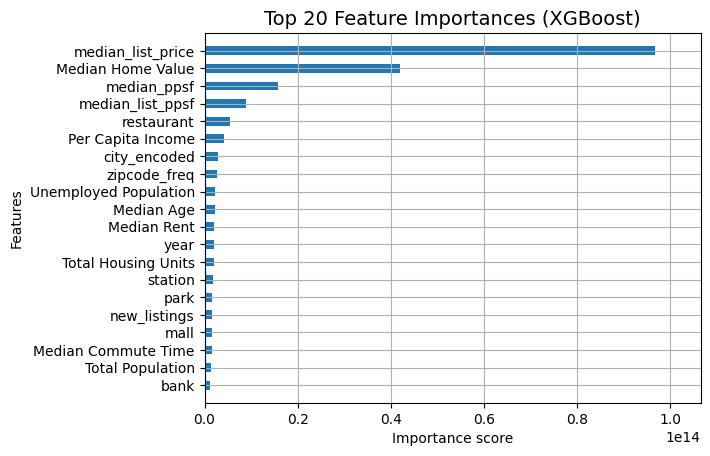

In [5]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(
    xgb_model,
    importance_type="gain",
    max_num_features=20,
    height=0.5,
    show_values=False
)
plt.title("Top 20 Feature Importances (XGBoost)", fontsize=14)
plt.show()